In [6]:
import pandas as pd
data = pd.read_excel("C:/Users/fatma/Downloads/archive/water_potability.xlsx")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.942046,215.673786,56488.672413,3.231438,129.000000,541.915468,9.313771,70.828374,4.354288,1
1,5.324942,280.089655,35344.658047,13.043806,180.206746,392.421496,10.504820,55.084668,4.427138,1
2,8.848586,188.919983,32033.332019,13.127000,182.397370,479.791975,12.070444,77.671337,4.014682,1
3,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
4,4.788861,234.893703,28174.620516,10.850036,187.424131,444.854321,11.784799,89.010974,2.896852,1


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

df = pd.read_excel("C:/Users/fatma/Downloads/archive/water_potability.xlsx")
df.dropna(inplace=True)

y = LabelEncoder().fit_transform(df['Potability'])
X = df.drop('Potability', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVC(probability=True, random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)

print(f'Accuracy (Train Set SVM): {accuracy_train * 100:.2f}%')
print(f'Accuracy (Test Set SVM): {accuracy_test * 100:.2f}%')


Accuracy (Train Set SVM): 75.56%
Accuracy (Test Set SVM): 69.98%


In [3]:
data.describe().loc[['min', '50%', 'mean', 'max', 'std']].T.style.background_gradient(axis=1)


,min,50%,mean,max,std
ph,0.000000,7.036752,7.080795,14.000000,1.594320
Hardness,47.432000,196.967627,196.369496,323.124000,32.879761
Solids,320.942611,20927.833607,22014.092526,61227.196008,8768.570828
Chloramines,0.352000,7.130299,7.122277,13.127000,1.583085
Sulfate,129.000000,333.073546,333.775777,481.030642,41.416840
Conductivity,181.483754,421.884968,426.205111,753.342620,80.824064
Organic_carbon,2.200000,14.218338,14.284970,28.300000,3.308162
Trihalomethanes,0.738000,66.622485,66.396293,124.000000,16.175008
Turbidity,1.450000,3.955028,3.966786,6.739000,0.780382
Potability,0.000000,0.000000,0.390110,1.000000,0.487849


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
import warnings


Potability
0    1998
1    1278
Name: count, dtype: int64


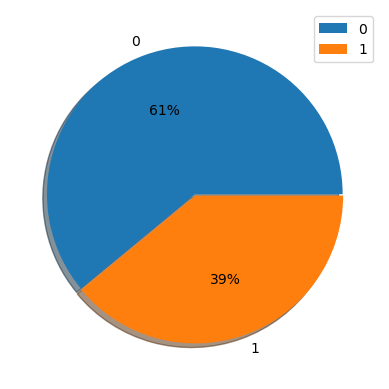

In [7]:
tar = data['Potability'].value_counts()
print(tar)

plt.pie(tar, labels=[0, 1], explode=[0, 0.01], autopct='%.f%%', shadow=True)
plt.legend()
plt.show()

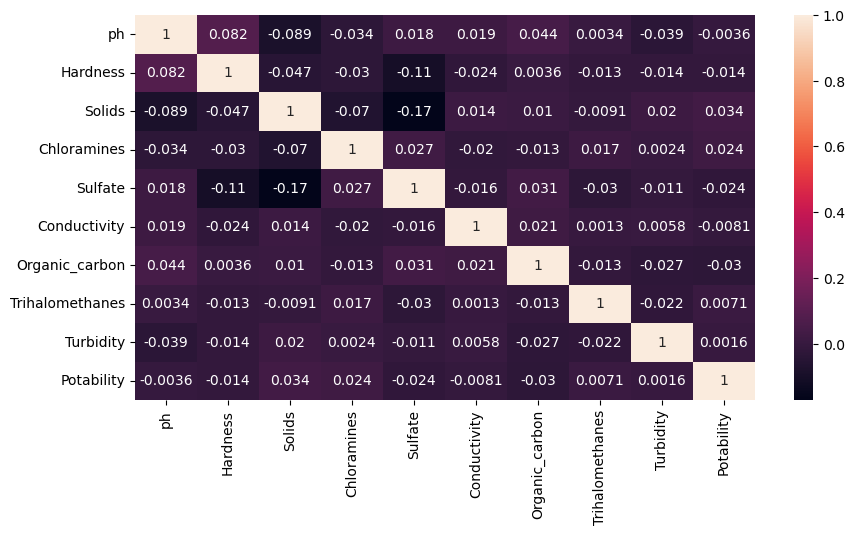

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

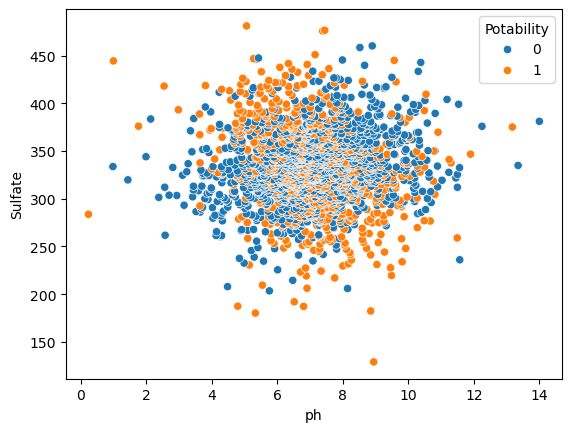

In [11]:
sns.scatterplot(x="ph", y="Sulfate", hue="Potability", data=data)
plt.show()

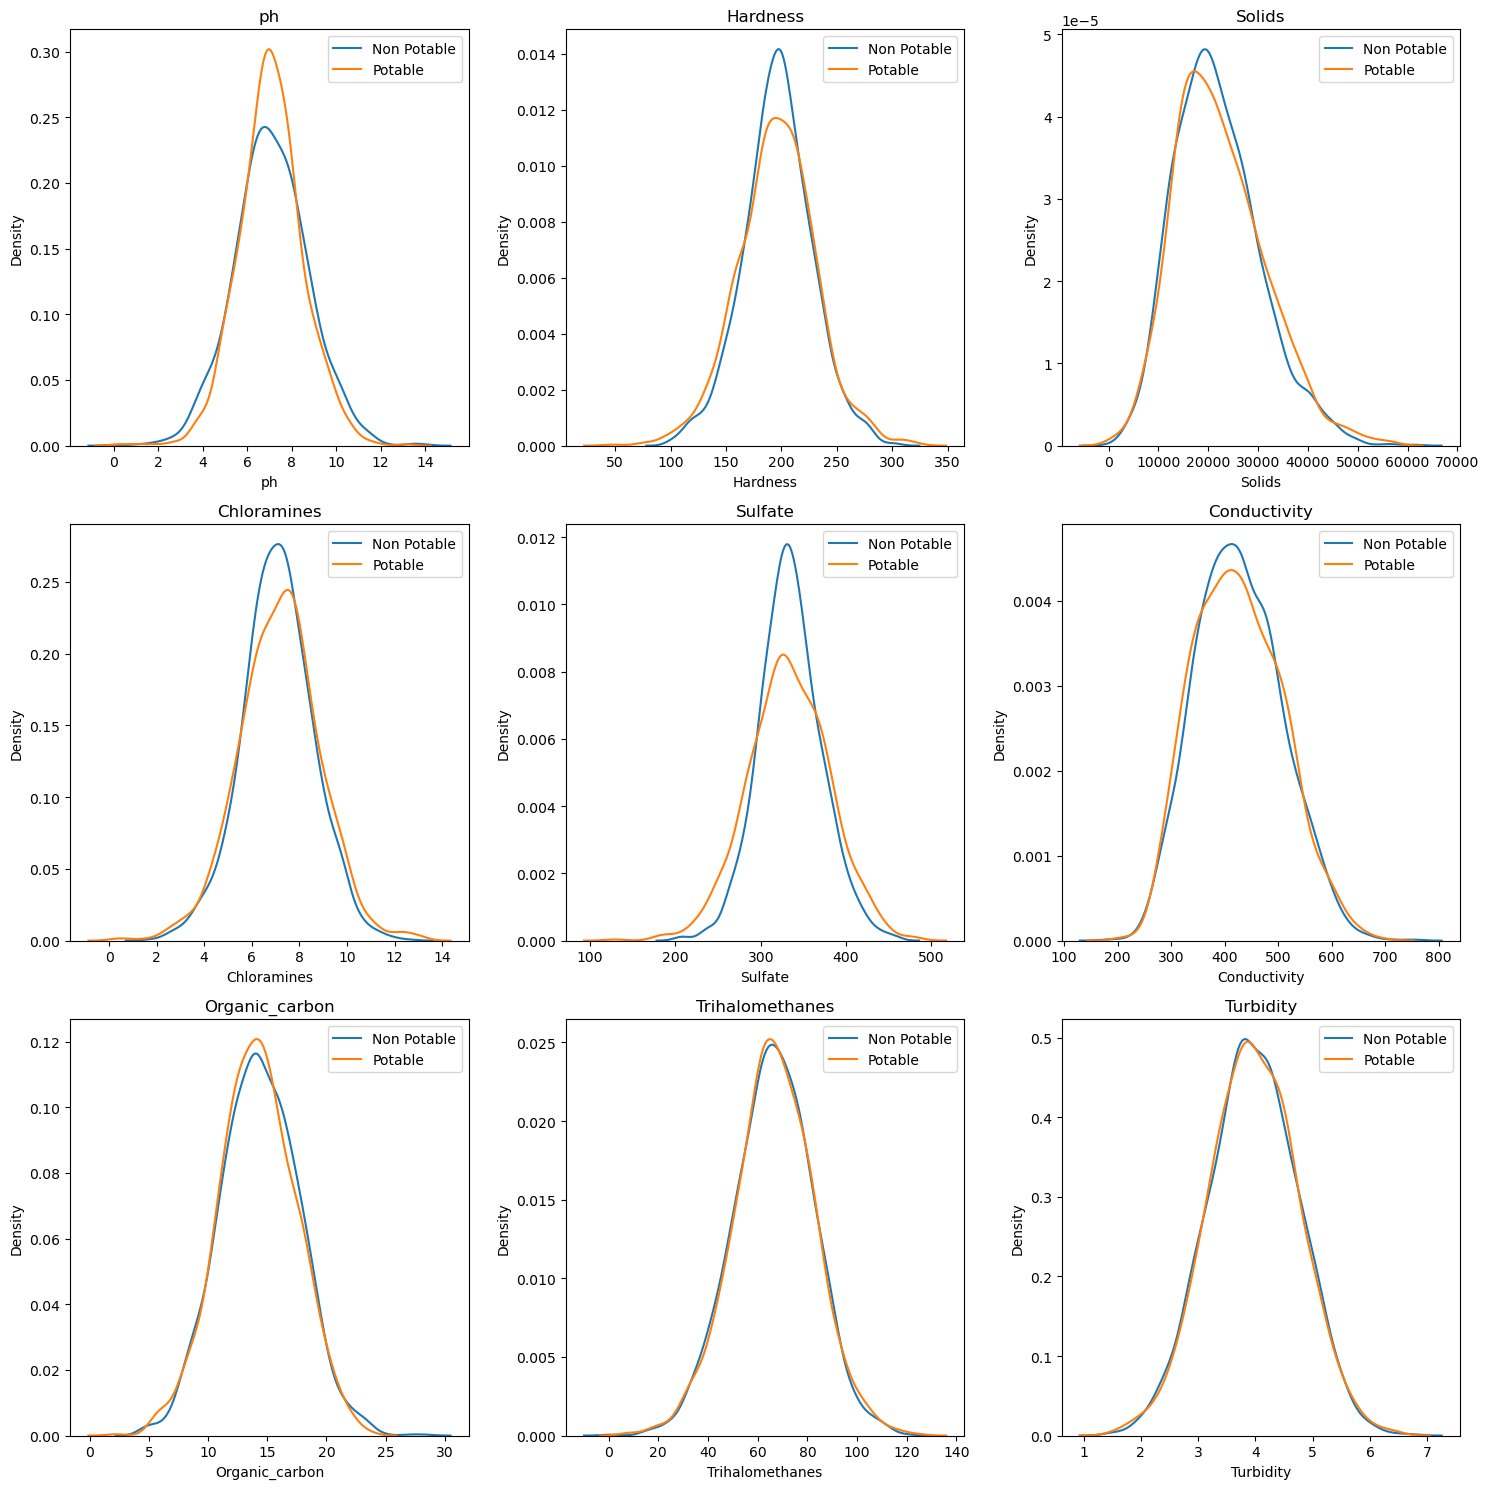

In [13]:
non_potable = data.query("Potability == 0")
potable = data.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax,col in enumerate(data.columns[:9]):
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()

plt.tight_layout()